## **MSc Major Research Project**

## **Exploring the effect of daytime physical activity on sleep quality**

Melania Czobit

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Daytime activity analysis**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/My Drive/MRP/FitbitActivity.csv'
df = pd.read_csv(path)
df

,egoid,datadate,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,lowrangemins,fatburnmins,cardiomins,peakmins,lowrangecal,fatburncal,cardiocal,peakcal
0,44869,2015-07-28,91,86.669746,11.979352,4034.0,1.0,1034.0,149.0,2.0,12.0,1211,75,9,4,1364.19900,159.79671,61.841969,35.46954
1,44869,2015-07-29,97,87.975342,8.990446,3702.0,0.0,769.0,153.0,0.0,0.0,1273,103,3,0,1322.14650,262.28818,11.997700,0.00000
2,44869,2015-07-30,100,83.281448,16.863153,3660.0,0.0,795.0,139.0,3.0,18.0,1267,109,15,16,1288.98170,232.89841,77.910057,127.26234
3,44869,2015-07-31,80,91.707787,12.464956,6016.0,13.0,954.0,259.0,0.0,0.0,846,295,2,0,954.04791,629.57526,2.224320,0.00000
4,44869,2015-08-01,78,101.268140,10.464320,9846.0,5.0,1078.0,282.0,24.0,8.0,628,502,0,0,702.88513,1080.83410,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357822,35925,2018-03-30,28,76.786240,11.834908,3951.0,3.0,1332.0,88.0,8.0,12.0,375,32,0,0,740.04407,174.29564,0.000000,0.00000
357823,35925,2018-03-31,56,82.338219,14.672435,14762.0,42.0,1163.0,167.0,49.0,61.0,674,145,0,0,1335.35630,910.30292,0.000000,0.00000
357824,35925,2018-04-01,58,78.426506,16.393349,13986.0,31.0,1132.0,198.0,58.0,52.0,694,136,0,0,1384.27310,849.63190,0.000000,0.00000
357825,35925,2018-04-02,48,89.128021,16.900349,19277.0,12.0,1090.0,168.0,82.0,100.0,483,218,2,0,1087.21060,1419.65470,20.659019,0.00000


In [5]:
df.shape

(357827, 19)

In [6]:
df['datadate'] = pd.to_datetime(df['datadate'])
df = df.rename(columns={'datadate': 'date'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357827 entries, 0 to 357826
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   egoid                 357827 non-null  int64         
 1   date                  357827 non-null  datetime64[ns]
 2   complypercent         357827 non-null  int64         
 3   meanrate              357827 non-null  float64       
 4   sdrate                357826 non-null  float64       
 5   steps                 356751 non-null  float64       
 6   floors                356927 non-null  float64       
 7   sedentaryminutes      355844 non-null  float64       
 8   lightlyactiveminutes  355844 non-null  float64       
 9   fairlyactiveminutes   357823 non-null  float64       
 10  veryactiveminutes     355844 non-null  float64       
 11  lowrangemins          357827 non-null  int64         
 12  fatburnmins           357827 non-null  int64         
 13 

In [ ]:
df.describe()

,egoid,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,lowrangemins,fatburnmins,cardiomins,peakmins,lowrangecal,fatburncal,cardiocal,peakcal
count,357827.000000,357827.000000,357827.000000,357826.000000,356751.000000,356927.000000,355844.000000,355844.000000,357823.000000,355844.000000,357827.000000,357827.000000,357827.000000,357827.000000,357827.000000,357827.000000,357827.000000,357827.000000
mean,56376.037180,85.228499,74.001024,15.430787,11051.223360,17.236592,798.992190,203.326781,25.326321,31.179885,1100.332739,113.356653,4.134316,0.953796,1698.248551,557.377978,38.888236,10.776925
std,25759.271748,22.456762,9.594119,4.220816,5873.476411,19.416539,265.477736,97.808326,30.709126,36.190696,314.921616,103.457654,9.883374,4.534229,633.774136,511.034060,99.952610,54.906745
min,10237.000000,1.000000,40.174862,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33740.000000,83.000000,67.280514,12.597967,6948.000000,7.000000,631.000000,151.000000,4.000000,2.000000,1004.000000,39.000000,0.000000,0.000000,1328.779700,185.058885,0.000000,0.000000
50%,56543.000000,96.000000,73.469315,15.047787,10592.000000,13.000000,728.000000,205.000000,16.000000,20.000000,1219.000000,86.000000,0.000000,0.000000,1709.270400,432.766390,0.000000,0.000000
75%,79167.000000,98.000000,80.047359,17.926842,14458.000000,21.000000,871.000000,261.000000,35.000000,47.000000,1315.000000,156.000000,3.000000,0.000000,2117.576800,776.951845,24.386604,0.000000
max,99978.000000,100.000000,190.721850,66.399506,87677.000000,670.000000,1440.000000,937.000000,506.000000,650.000000,1440.000000,1344.000000,343.000000,428.000000,5644.347200,8111.299800,4543.892100,4822.670900


In [ ]:
df.isnull().sum()

egoid                      0
date                       0
complypercent              0
meanrate                   0
sdrate                     1
steps                   1076
floors                   900
sedentaryminutes        1983
lightlyactiveminutes    1983
fairlyactiveminutes        4
veryactiveminutes       1983
lowrangemins               0
fatburnmins                0
cardiomins                 0
peakmins                   0
lowrangecal                0
fatburncal                 0
cardiocal                  0
peakcal                    0
dtype: int64

In [ ]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100,3)))

egoid - 0.0%
datadate - 0.0%
complypercent - 0.0%
meanrate - 0.0%
sdrate - 0.0%
steps - 0.301%
floors - 0.252%
sedentaryminutes - 0.554%
lightlyactiveminutes - 0.554%
fairlyactiveminutes - 0.001%
veryactiveminutes - 0.554%
lowrangemins - 0.0%
fatburnmins - 0.0%
cardiomins - 0.0%
peakmins - 0.0%
lowrangecal - 0.0%
fatburncal - 0.0%
cardiocal - 0.0%
peakcal - 0.0%


In [ ]:
df.isnull().groupby(df['egoid']).sum()

,egoid,datadate,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,lowrangemins,fatburnmins,cardiomins,peakmins,lowrangecal,fatburncal,cardiocal,peakcal
egoid,,,,,,,,,,,,,,,,,,,
10237,0,0,0,0,0,0,8,18,18,0,18,0,0,0,0,0,0,0,0
10469,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0
10547,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11002,0,0,0,0,0,0,12,18,18,0,18,0,0,0,0,0,0,0,0
11128,0,0,0,0,0,1,8,18,18,0,18,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
98760,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
98766,0,0,0,0,0,0,10,18,18,0,18,0,0,0,0,0,0,0,0


In [ ]:
# df_time = pd.DataFrame()
# df_time['timestamp_dt'] = pd.to_datetime(df['datadate'], format='%Y-%m-%d')
# df_time['year'] = df_time['timestamp_dt'].dt.year
# df_time['month'] = df_time['timestamp_dt'].dt.month
# df_time['weekday'] = df_time['timestamp_dt'].dt.weekday
# df_time

In [7]:
df2 = df.copy()
df2 = df2.set_index(['date'])

In [8]:
# It was found that some indivuals have recorded values for the same given day
temp = df2[df2.egoid==23287]
print(temp.index.is_unique)
temp.loc['2015-08-13']

False


,egoid,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,lowrangemins,fatburnmins,cardiomins,peakmins,lowrangecal,fatburncal,cardiocal,peakcal
date,,,,,,,,,,,,,,,,,,
2015-08-13,23287,98,52.676079,11.336383,7253.0,1.0,551.0,175.0,6.0,0.0,1346,0,0,0,2465.1897,0.0,0.0,0.0
2015-08-13,23287,98,52.676079,11.336383,7253.0,1.0,NaN,NaN,6.0,NaN,1346,0,0,0,2465.1897,0.0,0.0,0.0


In [ ]:
temp2 = df2[df2.egoid==98766]
# print(temp2.index.is_unique)
temp2.loc['2015-08-08']

,egoid,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,lowrangemins,fatburnmins,cardiomins,peakmins,lowrangecal,fatburncal,cardiocal,peakcal
date,,,,,,,,,,,,,,,,,,
2015-08-08,98766,98,67.690292,14.85327,11672.0,10.0,612.0,242.0,47.0,7.0,1371,40,0,0,2648.6892,248.7726,0.0,0.0
2015-08-08,98766,98,67.690292,14.85327,11672.0,NaN,NaN,NaN,47.0,NaN,1371,40,0,0,2648.6892,248.7726,0.0,0.0


In [ ]:
temp = temp.reset_index() # makes date column part of your data
temp = temp.drop_duplicates('date',keep='first').set_index('date')
print(temp.index.is_unique)
temp.loc['2015-08-13']

True


egoid                   23287.000000
complypercent              98.000000
meanrate                   52.676079
sdrate                     11.336383
steps                    7253.000000
floors                      1.000000
sedentaryminutes          551.000000
lightlyactiveminutes      175.000000
fairlyactiveminutes         6.000000
veryactiveminutes           0.000000
lowrangemins             1346.000000
fatburnmins                 0.000000
cardiomins                  0.000000
peakmins                    0.000000
lowrangecal              2465.189700
fatburncal                  0.000000
cardiocal                   0.000000
peakcal                     0.000000
Name: 2015-08-13 00:00:00, dtype: float64

In [9]:
ids = df2['egoid'].value_counts().index.to_list()

df3 = pd.DataFrame()
for i in ids:
  temp = df2[df2.egoid==i]
  if (temp.index.is_unique == False):
    temp = temp.reset_index() # makes date column part of your data
    temp = temp.drop_duplicates('date',keep='first').set_index('date')
  
  temp = temp.resample('D').ffill()
  temp = temp.fillna(temp.mean())
  df3 = df3.append(temp)

In [10]:
df3

,egoid,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,lowrangemins,fatburnmins,cardiomins,peakmins,lowrangecal,fatburncal,cardiocal,peakcal
date,,,,,,,,,,,,,,,,,,
2015-07-26,23287,100,58.269985,21.795397,4056.0,6.0,620.0,153.0,9.0,45.0,1376,16,32,2,2361.26810,126.885720,436.44537,28.672541
2015-07-27,23287,91,54.651180,11.042264,7209.0,19.0,761.0,128.0,9.0,22.0,1311,2,0,0,2404.60110,16.866199,0.00000,0.000000
2015-07-28,23287,97,57.792439,20.188248,8805.0,18.0,730.0,103.0,4.0,72.0,1252,9,35,0,2296.00880,85.109444,473.16177,0.000000
2015-07-29,23287,100,57.031990,12.625061,10242.0,15.0,780.0,129.0,12.0,47.0,1424,14,0,0,2717.92330,124.290920,0.00000,0.000000
2015-07-30,23287,98,59.058781,19.435152,6344.0,11.0,781.0,124.0,12.0,56.0,1364,24,24,0,2425.48930,244.949130,312.15445,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-16,57045,81,73.216454,13.576087,8038.0,14.0,520.0,242.0,8.0,1.0,1118,37,0,0,1910.49930,180.135760,0.00000,0.000000
2016-07-17,57045,73,83.410645,11.666415,10980.0,15.0,1002.0,438.0,0.0,0.0,970,82,0,0,2057.78880,307.602260,0.00000,0.000000
2016-07-18,57045,98,70.724930,10.990591,6631.0,7.0,596.0,277.0,0.0,0.0,1385,11,0,0,2246.22240,61.428249,0.00000,0.000000


In [ ]:
df3.describe()

,egoid,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,lowrangemins,fatburnmins,cardiomins,peakmins,lowrangecal,fatburncal,cardiocal,peakcal
count,460962.000000,460962.000000,460962.000000,460962.000000,460962.000000,460962.000000,460962.000000,460962.000000,460962.000000,460962.000000,460962.000000,460962.000000,460962.00000,460962.000000,460962.000000,460962.000000,460962.000000,460962.000000
mean,55792.633824,74.444655,74.467057,15.067147,9819.690548,15.492886,878.049125,176.912082,22.047863,27.417933,961.247504,98.488665,3.77240,0.865104,1475.358362,483.029194,34.930114,9.714507
std,25709.265766,31.126616,11.217580,4.854518,6222.773730,19.660870,305.037460,107.288491,29.414526,34.935633,418.916833,100.087805,9.43253,4.283183,750.834914,497.620128,94.421985,51.655100
min,10237.000000,1.000000,40.174862,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33388.000000,54.000000,66.934288,12.038574,5198.000000,5.000000,657.000000,102.000000,0.000000,0.000000,682.000000,25.000000,0.00000,0.000000,953.840238,113.000220,0.000000,0.000000
50%,55340.000000,92.000000,73.563964,14.683105,9481.000000,12.000000,777.000000,185.000000,12.000000,16.000000,1144.000000,70.000000,0.00000,0.000000,1550.799200,347.886600,0.000000,0.000000
75%,77872.000000,98.000000,80.810100,17.775765,13597.000000,20.000000,1116.000000,247.000000,31.000000,41.000000,1292.000000,140.000000,3.00000,0.000000,2001.866150,692.277830,19.702751,0.000000
max,99978.000000,100.000000,190.721850,66.399506,87677.000000,670.000000,1440.000000,937.000000,506.000000,650.000000,1440.000000,1344.000000,343.00000,428.000000,5644.347200,8111.299800,4543.892100,4822.670900


In [ ]:
df3.isnull().sum()

egoid                   0
complypercent           0
meanrate                0
sdrate                  0
steps                   0
floors                  0
sedentaryminutes        0
lightlyactiveminutes    0
fairlyactiveminutes     0
veryactiveminutes       0
lowrangemins            0
fatburnmins             0
cardiomins              0
peakmins                0
lowrangecal             0
fatburncal              0
cardiocal               0
peakcal                 0
dtype: int64

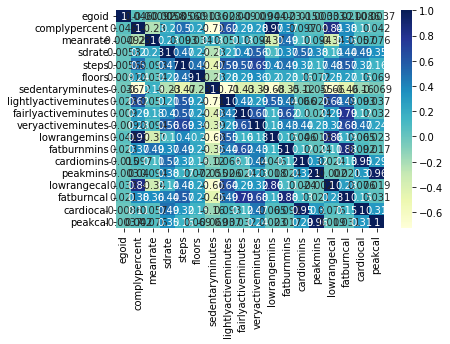

In [ ]:
corr_matrix=df3.corr()
sns.heatmap(corr_matrix,cmap='YlGnBu',annot=True)

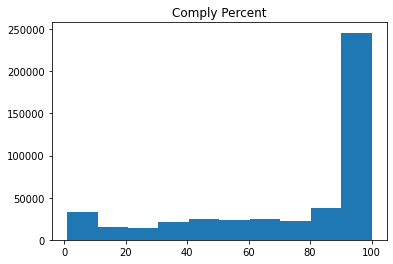

In [ ]:
comply = df3['complypercent']
plt.hist(comply)
plt.title("Comply Percent")
plt.show()

Text(0, 0.5, 'Value')

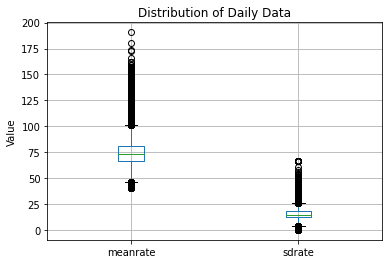

In [ ]:
boxplot_rate = df3.boxplot(column=['meanrate','sdrate'])
plt.title('Distribution of Daily Data')
plt.ylabel('Value')

Text(0, 0.5, 'Value')

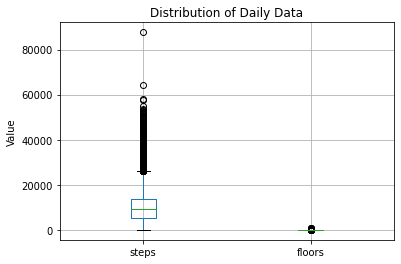

In [ ]:
boxplot_steps = df3.boxplot(column=['steps','floors'])
plt.title('Distribution of Daily Data')
plt.ylabel('Value')

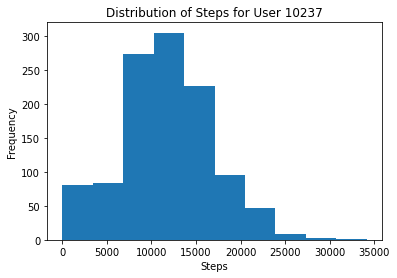

In [ ]:
data = df3[df3['egoid']==10237]
plt.hist(data['steps'])
plt.title("Distribution of Steps for User 10237")
plt.xlabel("Steps")
plt.ylabel("Frequency")
plt.show()

(array([1, 2, 3, 4]), <a list of 4 Text major ticklabel objects>)

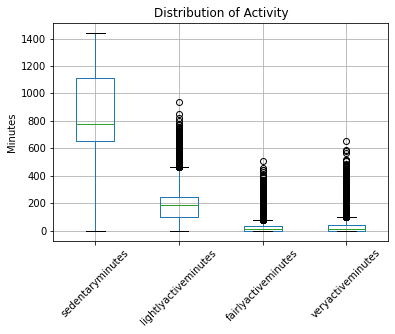

In [ ]:
boxplot_activity = df3.boxplot(column=['sedentaryminutes','lightlyactiveminutes','fairlyactiveminutes','veryactiveminutes'])
plt.title("Distribution of Activity")
plt.ylabel('Minutes')
plt.xticks(rotation=45)

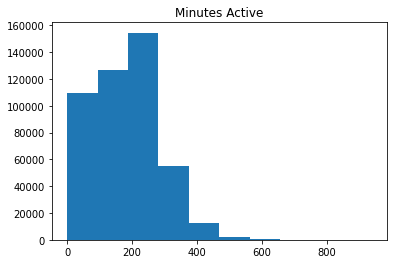

In [ ]:
active = df3['lightlyactiveminutes']
plt.hist(active)
plt.title("Minutes Active")
plt.show()

(array([1, 2, 3, 4]), <a list of 4 Text major ticklabel objects>)

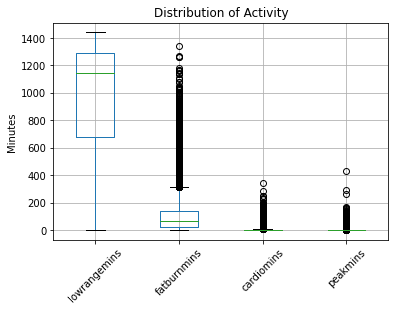

In [ ]:
boxplot_min= df3.boxplot(column=['lowrangemins','fatburnmins','cardiomins','peakmins'])
plt.title("Distribution of Activity")
plt.ylabel('Minutes')
plt.xticks(rotation=45)

(array([1, 2, 3, 4]), <a list of 4 Text major ticklabel objects>)

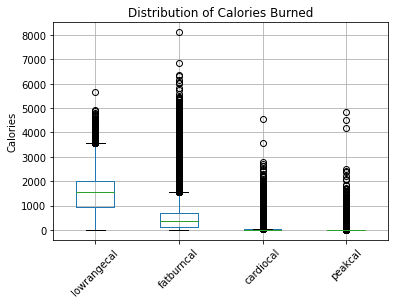

In [ ]:
boxplot_cal = df3.boxplot(column=['lowrangecal','fatburncal','cardiocal','peakcal'])
plt.title("Distribution of Calories Burned")
plt.ylabel('Calories')
plt.xticks(rotation=45)

## **Sleep Dataset Analysis**

In [11]:
path_sleep = '/content/drive/My Drive/MRP/FitbitSleep.csv'
df_sleep = pd.read_csv(path_sleep)
df_sleep

,egoid,dataDate,timetobed,timeoutofbed,bedtimedur,minstofallasleep,minsafterwakeup,minsasleep,minsawake,Efficiency
0,44869,2015-07-28,6:25:00,10:27:00,243,0,0,232,11,0.954733
1,44869,2015-07-29,3:26:30,7:21:30,236,1,4,216,15,0.935065
2,44869,2015-07-29,12:03:30,16:44:30,282,3,0,267,12,0.956989
3,44869,2015-07-30,6:27:30,14:31:30,485,4,0,451,30,0.937630
4,44869,2015-07-31,4:40:30,6:27:30,108,0,0,100,8,0.925926
...,...,...,...,...,...,...,...,...,...,...
333703,35925,2017-11-13,23:45:00,9:15:00,571,0,0,533,38,0.933450
333704,35925,2017-11-16,23:16:30,8:20:30,545,0,1,489,55,0.898897
333705,35925,2017-11-26,4:19:00,8:43:00,265,6,1,249,9,0.965116
333706,35925,2017-12-17,17:55:30,19:11:30,77,2,3,70,2,0.972222


In [12]:
df_sleep['dataDate'] = pd.to_datetime(df_sleep['dataDate'])

In [13]:
df_sleep = df_sleep.rename(columns={'dataDate': 'date'})

In [ ]:
df_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333708 entries, 0 to 333707
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   egoid             333708 non-null  int64         
 1   date              333708 non-null  datetime64[ns]
 2   timetobed         333708 non-null  object        
 3   timeoutofbed      333706 non-null  object        
 4   bedtimedur        333708 non-null  int64         
 5   minstofallasleep  333708 non-null  int64         
 6   minsafterwakeup   333708 non-null  int64         
 7   minsasleep        333708 non-null  int64         
 8   minsawake         333708 non-null  int64         
 9   Efficiency        333708 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 25.5+ MB


In [ ]:
temp = df_sleep[df_sleep.egoid==22455]
temp.head(20)

,egoid,date,timetobed,timeoutofbed,bedtimedur,minstofallasleep,minsafterwakeup,minsasleep,minsawake,Efficiency
241183,22455,2015-08-11,0:14:30,6:30:30,377,3,1,357,16,0.957105
241184,22455,2015-08-12,19:30:00,5:31:00,602,4,0,566,32,0.946488
241185,22455,2015-08-12,14:08:30,15:11:30,64,2,0,58,4,0.935484
241186,22455,2015-08-13,0:15:30,7:19:30,425,3,0,385,37,0.912322
241187,22455,2015-08-14,23:27:30,6:39:30,433,3,0,403,27,0.937209
241188,22455,2015-08-14,18:18:00,22:05:00,228,6,5,207,10,0.953917
241189,22455,2015-08-15,0:50:30,5:42:30,293,0,0,274,19,0.935154
241190,22455,2015-08-15,19:51:30,23:08:30,198,2,7,182,7,0.962963
241191,22455,2015-08-16,2:21:00,6:18:00,238,7,0,219,12,0.948052
241192,22455,2015-08-17,23:21:00,7:11:00,471,8,0,426,37,0.920086


In [14]:
df_sleep2 = df_sleep.copy()
df_sleep2 = df_sleep2.set_index(['date'])

ids_sleep = df_sleep2['egoid'].value_counts().index.to_list()

df_sleep3 = pd.DataFrame()
for i in ids_sleep:
  temp = df_sleep2[df_sleep2.egoid==i]
  if (temp.index.is_unique == False):
    temp = temp.reset_index() # makes date column part of your data
    temp = temp.drop_duplicates('date',keep='first').set_index('date')
  
  temp = temp.resample('D').ffill()
  # temp = temp.fillna(temp.mean())
  df_sleep3 = df_sleep3.append(temp)

In [15]:
df_sleep3

,egoid,timetobed,timeoutofbed,bedtimedur,minstofallasleep,minsafterwakeup,minsasleep,minsawake,Efficiency
date,,,,,,,,,
2015-08-11,22455,0:14:30,6:30:30,377,3,1,357,16,0.957105
2015-08-12,22455,19:30:00,5:31:00,602,4,0,566,32,0.946488
2015-08-13,22455,0:15:30,7:19:30,425,3,0,385,37,0.912322
2015-08-14,22455,23:27:30,6:39:30,433,3,0,403,27,0.937209
2015-08-15,22455,0:50:30,5:42:30,293,0,0,274,19,0.935154
...,...,...,...,...,...,...,...,...,...
2016-07-12,76791,17:21:39,17:32:39,12,0,0,12,0,1.000000
2016-07-13,76791,1:14:30,6:58:30,345,2,0,333,10,0.970845
2016-10-07,63954,2:37:00,9:03:00,387,5,0,355,27,0.929319


In [ ]:
df_sleep3.isnull().sum()

egoid               0
timetobed           0
timeoutofbed        0
bedtimedur          0
minstofallasleep    0
minsafterwakeup     0
minsasleep          0
minsawake           0
Efficiency          0
dtype: int64

In [16]:
a = df_sleep3['Efficiency']
df_sleep3['class'] = [1 if 0<x<=0.2 else 2 if 0.2<x<=0.4 else 3 if 0.4<x<=0.6 else 4 if 0.6<x<=0.8 else 5 if 0.8<x<=1 else x for x in a]
df_sleep3['class'].value_counts()

5    446422
3      5349
4      3211
2       958
1        33
Name: class, dtype: int64

In [17]:
df_sleep3['class'] = df_sleep3['class'].astype('category')

In [18]:
means_for_categories = df_sleep3.groupby('class').mean()
means_for_categories.drop('egoid', axis=1)

,bedtimedur,minstofallasleep,minsafterwakeup,minsasleep,minsawake,Efficiency
class,,,,,,
1,334.848485,16.636364,16.060606,50.151515,252.000000,0.155541
2,437.488518,8.509395,15.275574,144.111691,269.591858,0.345997
3,406.789306,8.382501,12.865395,193.617872,191.923537,0.503928
4,376.520087,7.539707,9.302709,250.315789,109.361881,0.697665
5,421.370815,2.638474,0.936889,394.433227,23.362225,0.945271


In [ ]:
df_sleep3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 455973 entries, 2015-08-11 to 2015-09-03
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   egoid             455973 non-null  int64   
 1   timetobed         455973 non-null  object  
 2   timeoutofbed      455973 non-null  object  
 3   bedtimedur        455973 non-null  int64   
 4   minstofallasleep  455973 non-null  int64   
 5   minsafterwakeup   455973 non-null  int64   
 6   minsasleep        455973 non-null  int64   
 7   minsawake         455973 non-null  int64   
 8   Efficiency        455973 non-null  float64 
 9   class             455973 non-null  category
dtypes: category(1), float64(1), int64(6), object(2)
memory usage: 35.2+ MB


In [ ]:
df_sleep3.describe()

,egoid,bedtimedur,minstofallasleep,minsafterwakeup,minsasleep,minsawake,Efficiency
count,455973.000000,455973.000000,455973.000000,455973.000000,455973.000000,455973.000000,455973.000000
mean,55890.350168,420.911519,2.753720,1.166955,390.511741,26.479103,0.937034
std,25677.916793,138.765922,9.547902,4.322896,131.766439,29.707599,0.068050
min,10237.000000,8.000000,0.000000,0.000000,1.000000,0.000000,0.062092
25%,33657.000000,357.000000,0.000000,0.000000,328.000000,11.000000,0.922581
50%,55424.000000,437.000000,2.000000,0.000000,408.000000,21.000000,0.949212
75%,77941.000000,505.000000,3.000000,1.000000,473.000000,34.000000,0.970149
max,99978.000000,1370.000000,381.000000,281.000000,1295.000000,561.000000,1.000000


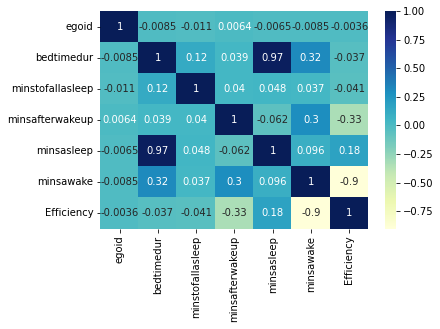

In [ ]:
corr_matrix=df_sleep3.corr()
sns.heatmap(corr_matrix,cmap='YlGnBu',annot=True)

Text(0, 0.5, 'Minutes')

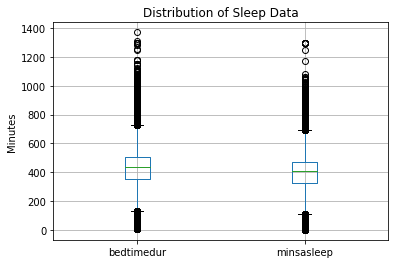

In [ ]:
boxplot = df_sleep3.boxplot(column=['bedtimedur','minsasleep'])
plt.title('Distribution of Sleep Data')
plt.ylabel('Minutes')

Text(0, 0.5, 'Minutes')

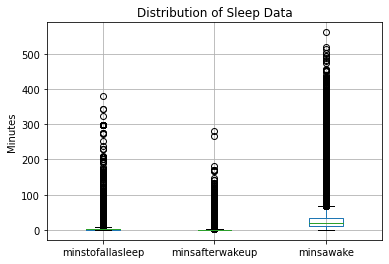

In [ ]:
boxplot2 = df_sleep3.boxplot(column=['minstofallasleep','minsafterwakeup','minsawake'])
plt.title('Distribution of Sleep Data')
plt.ylabel('Minutes')

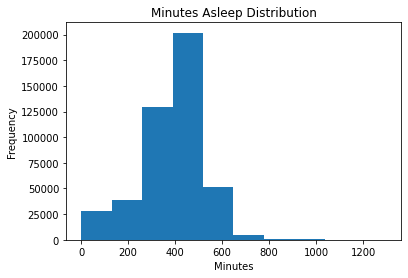

In [ ]:
sleep = df_sleep3['minsasleep']
plt.hist(sleep)
plt.title("Minutes Asleep Distribution")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()

**Merging the two datasets**

In [19]:
daily_ids = df3['egoid'].value_counts().index.to_list()
sleep_ids = df_sleep3['egoid'].value_counts().index.to_list()

In [20]:
missing_id = [item for item in daily_ids if item not in sleep_ids]
print(missing_id)
missing_id2 =  [item for item in sleep_ids if item not in daily_ids]
print(missing_id2)

[55340]
[]


In [21]:
# remove egoid 55340 as no sleep data collected
df3 = df3[df3.egoid != 55340]

In [22]:
daily = df3['egoid'].value_counts().to_dict()
sleep = df_sleep3['egoid'].value_counts().to_dict()

# print(daily)
# print(sleep)

In [23]:
daily.keys() == sleep.keys()

True

In [24]:
remove_daily = []
remove_sleep = []

for key in daily:
  if daily[key] < 180:
    remove_daily.append(key)

for key in sleep:
  if sleep[key] < 180:
    remove_sleep.append(key)


remove_ids = list(set(remove_daily + remove_sleep))
# print(remove_ids)

In [25]:
for id in remove_ids:
  df3 = df3[df3.egoid != id]
  df_sleep3 = df_sleep3[df_sleep3.egoid != id]

In [ ]:
# for key in daily:
#     if key in sleep:
#       print(key, daily[key], sleep[key])

In [26]:
# Some days reported are missing either daytime or sleep data
# joining the two tables will be an inner join, dropping rows that do not have complete data for a given day 
print(len(df3))
print(len(df_sleep3))

451012
448056


In [27]:
df_all = df3.merge(df_sleep3, how='inner', on=["egoid","date"])
df_all

,egoid,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,...,peakcal,timetobed,timeoutofbed,bedtimedur,minstofallasleep,minsafterwakeup,minsasleep,minsawake,Efficiency,class
date,,,,,,,,,,,,,,,,,,,,,
2015-07-26,23287,100,58.269985,21.795397,4056.0,6.0,620.0,153.0,9.0,45.0,...,28.672541,0:18:00,10:30:00,613,0,14,590,9,0.984975,5
2015-07-27,23287,91,54.651180,11.042264,7209.0,19.0,761.0,128.0,9.0,22.0,...,0.000000,0:07:00,7:08:00,422,3,0,403,16,0.961814,5
2015-07-28,23287,97,57.792439,20.188248,8805.0,18.0,730.0,103.0,4.0,72.0,...,0.000000,22:22:00,7:14:00,533,2,5,514,12,0.977186,5
2015-07-29,23287,100,57.031990,12.625061,10242.0,15.0,780.0,129.0,12.0,47.0,...,0.000000,22:24:00,7:10:00,527,32,6,316,173,0.646217,4
2015-07-30,23287,98,59.058781,19.435152,6344.0,11.0,781.0,124.0,12.0,56.0,...,0.000000,23:19:00,6:50:00,452,3,2,440,7,0.984340,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-26,54837,47,74.980034,12.485730,2006.0,2.0,1270.0,138.0,1.0,10.0,...,0.000000,2:25:00,12:40:00,616,0,0,581,35,0.943182,5
2016-05-27,54837,65,66.002235,25.104258,6654.0,15.0,746.0,34.0,3.0,63.0,...,35.777420,23:39:00,9:53:00,615,0,0,580,35,0.943089,5
2016-05-28,54837,84,68.034920,18.201899,4626.0,2.0,710.0,205.0,39.0,4.0,...,10.444340,0:40:30,8:41:30,482,0,0,423,59,0.877593,5


In [28]:
mean_categories = df_all.groupby('class').mean()
mean_categories.drop('egoid', axis=1)

,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,lowrangemins,...,lowrangecal,fatburncal,cardiocal,peakcal,bedtimedur,minstofallasleep,minsafterwakeup,minsasleep,minsawake,Efficiency
class,,,,,,,,,,,,,,,,,,,,,
1,82.225806,77.282193,13.925234,14799.290323,57.193548,837.483871,230.483871,32.096774,27.290323,981.967742,...,1540.087570,488.866068,14.866156,4.141559,335.645161,15.354839,16.096774,51.096774,253.096774,0.158278
2,76.322440,77.475926,13.186891,10045.073300,15.434641,824.538126,193.281046,16.722222,22.673203,980.859477,...,1456.976531,462.323778,29.983184,7.692906,434.337691,7.679739,15.572985,144.588235,266.496732,0.348813
3,66.300682,77.513956,13.888943,10751.728581,17.523914,969.611168,159.688551,17.686055,23.957248,851.891057,...,1256.603338,414.709361,30.428871,9.867902,403.471012,8.302766,12.847101,191.635089,190.686055,0.503383
4,67.178995,77.452212,14.054740,8876.344220,12.383981,957.835326,165.445393,20.061159,22.324540,857.797310,...,1255.092425,441.612722,24.687632,5.491260,373.629203,7.128402,8.898495,249.322446,108.279859,0.698641
5,75.325951,74.250323,15.130672,9868.404785,15.596375,868.922034,178.922552,22.327186,27.795295,973.257318,...,1494.491753,488.186627,35.280433,9.818654,421.689223,2.633623,0.940905,394.699399,23.415296,0.945158


**Mulitple Logistic Regression**

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

In [45]:
df_all.iloc[3]

egoid                       23287
complypercent                 100
meanrate                 57.03199
sdrate                  12.625061
steps                     10242.0
floors                       15.0
sedentaryminutes            780.0
lightlyactiveminutes        129.0
fairlyactiveminutes          12.0
veryactiveminutes            47.0
lowrangemins                 1424
fatburnmins                    14
cardiomins                      0
peakmins                        0
lowrangecal             2717.9233
fatburncal              124.29092
cardiocal                     0.0
peakcal                       0.0
timetobed                22:24:00
timeoutofbed              7:10:00
bedtimedur                    527
minstofallasleep               32
minsafterwakeup                 6
minsasleep                    316
minsawake                     173
Efficiency               0.646217
class                           4
Name: 2015-07-29 00:00:00, dtype: object

In [46]:
value = df_all.copy()
value = value.drop(['timetobed', 'timeoutofbed', 'bedtimedur','minstofallasleep','minsafterwakeup','minsasleep','minsawake','Efficiency','class'], axis=1) 
value = value.iloc[3]
value = value.to_frame()
value = value.T
value

,egoid,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,lowrangemins,fatburnmins,cardiomins,peakmins,lowrangecal,fatburncal,cardiocal,peakcal
2015-07-29,23287.0,100.0,57.03199,12.625061,10242.0,15.0,780.0,129.0,12.0,47.0,1424.0,14.0,0.0,0.0,2717.9233,124.29092,0.0,0.0


In [48]:
user = df_all

X = user.drop(['timetobed', 'timeoutofbed', 'bedtimedur','minstofallasleep','minsafterwakeup','minsasleep','minsawake','Efficiency','class'], axis=1) 
y = user['Efficiency']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_pred2 = model.predict(value)
print(y_pred2)

print('MAE: ',metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

[0.93505941]
MAE:  0.0359335241361181
MSE:  0.004689448142736528
RMSE: 0.06847954543319142


In [53]:
user = df_all

X = user.drop(['timetobed', 'timeoutofbed', 'bedtimedur','minstofallasleep','minsafterwakeup','minsasleep','minsawake','Efficiency','class'], axis=1) 
y = user['Efficiency']

import statsmodels.api as sm
logit_model=sm.OLS(y,X)
result=logit_model.fit()
print(result.summary2())

                         Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.989       
Dependent Variable:     Efficiency       AIC:                         -793689.2087
Date:                   2022-07-10 18:56 BIC:                         -793491.0442
No. Observations:       446474           Log-Likelihood:              3.9686e+05  
Df Model:               18               F-statistic:                 2.187e+06   
Df Residuals:           446456           Prob (F-statistic):          0.00        
R-squared (uncentered): 0.989            Scale:                       0.0098962   
------------------------------------------------------------------------------------
                           Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
------------------------------------------------------------------------------------
egoid                      0.0000     0.0000    75.1829   0.0000    0.0000    0.0000
complypercent         

In [55]:
user = df_all

X = user.drop(['timetobed', 'timeoutofbed', 'bedtimedur','minstofallasleep','minsafterwakeup','minsasleep','minsawake','Efficiency','class'], axis=1) 
y = user['class']

X = sm.add_constant(X, prepend = False)

mnlogit_mod = sm.MNLogit(y, X)
mnlogit_fit = mnlogit_mod.fit()

print (mnlogit_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.116154
         Iterations 12
                          MNLogit Regression Results                          
Dep. Variable:                  class   No. Observations:               446474
Model:                        MNLogit   Df Residuals:                   446398
Method:                           MLE   Df Model:                           72
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                 0.04227
Time:                        19:01:56   Log-Likelihood:                -51860.
converged:                       True   LL-Null:                       -54149.
Covariance Type:            nonrobust   LLR p-value:                     0.000
             class=2       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
egoid                 2.969e-06   7.84e-06      0.379      0.705   -1.24e-05    1.83e-0

In [93]:
user = df_all[df_all.egoid==23287]
user = user.reset_index()

X = user.drop(['timetobed', 'timeoutofbed', 'bedtimedur','minstofallasleep','minsafterwakeup','minsasleep','minsawake','Efficiency','class'], axis=1) 
y = user['class']


tscv = TimeSeriesSplit(n_splits=5)
acc = []

for train_index, test_index in tscv.split(X):
  # print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]      
  y_train, y_test = y.iloc[train_index],  y.iloc[test_index]

  X_train = X_train.drop(['date','egoid'],axis=1)
  X_test = X_test.drop(['date','egoid'], axis=1)

  meanX = X_train.mean(axis=0)
  X_train -= meanX
  std = X_train.std(axis=0)
  X_train /= std
  X_test -= meanX
  X_test /= std

  model = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2',max_iter=5000)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  score =accuracy_score(y_test,y_pred)
  acc.append(score)

print('average accuracy: ', (sum(acc)/len(acc)))


# user = df_all
# model = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2')
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# print(classification_report(y_test,y_pred))

average accuracy:  0.9724137931034482


In [92]:
ids_all = df_all['egoid'].value_counts().index.to_list()
acc = []
for i in ids_all:
  print('id: ', i)
  user = df_all[df_all.egoid==i]
  user = user.reset_index()

  X = user.drop(['timetobed', 'timeoutofbed', 'bedtimedur','minstofallasleep','minsafterwakeup','minsasleep','minsawake','Efficiency','class'], axis=1) 
  y = user['class']

  tscv = TimeSeriesSplit(n_splits=5)

  for train_index, test_index in tscv.split(X):
  # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]      
    y_train, y_test = y.iloc[train_index],  y.iloc[test_index]

    X_train = X_train.drop(['date','egoid'],axis=1)
    X_test = X_test.drop(['date','egoid'], axis=1)

    meanX = X_train.mean(axis=0)
    X_train -= meanX
    std = X_train.std(axis=0)
    X_train /= std
    X_test -= meanX
    X_test /= std

    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2',max_iter=5000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score =accuracy_score(y_test,y_pred)
    acc.append(score)

print('average accuracy: ', (sum(acc)/len(acc)))


id:  89710


ValueError: ignored

**LSTM**

In [ ]:



model = Sequential()
model.add(LSTM(units = 50, return_sequences = True,  input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mse')
model.fit(X_train, y_train, epochs=50, batch_size=32)